In [70]:
from importlib import reload
import os, sys
import numpy as np
import matplotlib.pylab as plt
from scipy.stats import norm
from scipy.integrate import simpson

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

# Local imports
from scripts import utils as ut


plt.rcParams.update({'font.size': 16})

%reload_ext autoreload
%autoreload 2

In [72]:
epsilons = [0, 0, 0, 0.1, 0.1, 0.5, -0.2]
gammas = [0, 0, 0.1, 0, 0.1, 0.5, -0.2]
KL = []
kl_tol = 1e-4

norm_kwargs = {'loc': 0, 'scale': 1 + epsilons[0]}

d = [norm.rvs(**norm_kwargs, size=10000)]

KL_app = lambda epsilon, gamma: 0.5 * gamma ** 2 + epsilon**2 - gamma**2 * epsilon

x = np.linspace(-10, 10, 10000)

for i in range(1, len(epsilons)):
    norm_aux_kwargs = {}
    norm_aux_kwargs['loc'] = gammas[i]
    norm_aux_kwargs['scale'] = 1 + epsilons[i]
    KL.append(ut.KLval_2(norm, norm, kl_tol, 10000, norm_kwargs, norm_aux_kwargs))
    d.append(norm.rvs(**norm_aux_kwargs, size=10000))
    
    kl_th = simpson(norm.pdf(x, **norm_kwargs) * np.log(norm.pdf(x, **norm_kwargs) / norm.pdf(x, **norm_aux_kwargs)), x=x)
    print(KL[-1], KL_app(epsilons[i], gammas[i]), kl_th)

0.0 0.0 0.0
0.004949037222914942 0.005000000000000001 0.0050000000000000044
0.009445667554885332 0.010000000000000002 0.008533320300192639
0.01257723986406938 0.014000000000000002 0.012665551705151327
0.1820663592990029 0.25 0.18324288588594212
0.09034130983706913 0.06800000000000002 0.08935644868579022


In [73]:
colors = ['black', 'blue', 'green', 'orange', 'purple', 'cyan', 'brown']
labels = [r'$\mathcal{N}(0, 1)$', r'$\mathcal{N}(0, 1)$', r'$\mathcal{N}(0.1, 1)$', r'$\mathcal{N}(0, 1.1)$', r'$\mathcal{N}(0.1, 1.1)$', r'$\mathcal{N}(0.5, 1.5)$', r'$\mathcal{N}(-0.5, 1.5)$']

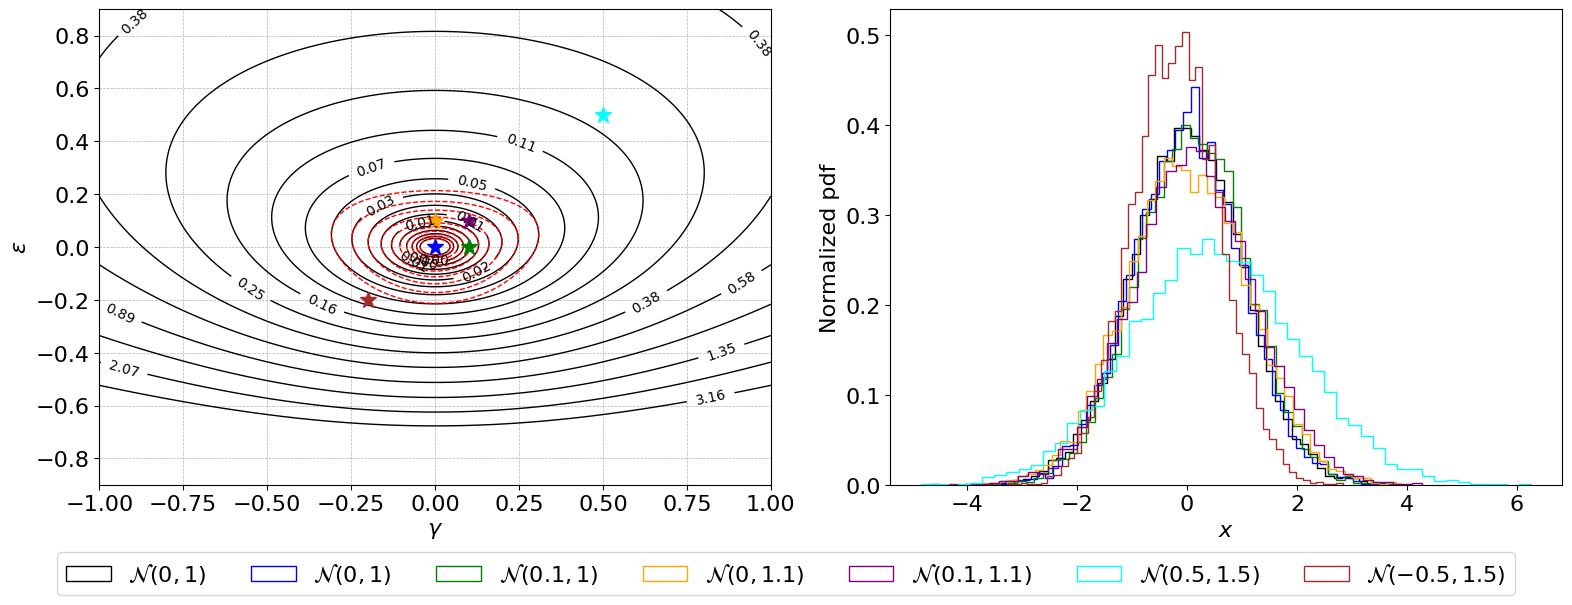

In [80]:

# Define range for sigma_2 and mu_2
#sigma2_vals = np.logspace(-1, 1, 300)
sigma2_vals = np.linspace(0.1, 1.9, 300)
mu2_vals = np.linspace(-1, 1, 300)

# Create meshgrid
S2, M2 = np.meshgrid(sigma2_vals, mu2_vals)

# Set sigma_1 = 1 and mu_1 = 0
sigma1 = 1
mu1 = 0

# Compute KL divergence
KL = np.log(S2 / sigma1) + (sigma1**2 + (mu1 - M2)**2) / (2 * S2**2) - 0.5

epsilon = S2 - 1
gamma = M2

# Correct perturbative KL expansion (matching KL(N1 || N2))
#KL_approx_correct = epsilon**2 + 0.5 * gamma**2#0.5 * gamma**2 - gamma**2 * epsilon + (1 + 1.5 * gamma**2) * epsilon**2


KL_approx_correct = epsilon**2+ gamma**2/2 - epsilon*gamma**2

# Plot contours of both exact KL and correct perturbative expansion
figsize=8
fig, ax = plt.subplots(figsize=(16, 6), ncols=2)

KL_contours = np.logspace(-3,0.5,20)


# Contours for exact KL divergence (black solid lines)
exact_contours = ax[0].contour(gamma, epsilon, KL, levels=KL_contours, colors='black', linestyles='solid', linewidths=1)
ax[0].clabel(exact_contours, inline=True, fontsize=10, fmt="%.2f")

# Contours for corrected perturbative KL divergence (red dashed lines)
perturbative_contours = ax[0].contour(gamma, epsilon, KL_approx_correct, levels=KL_contours[:10], colors='red', linestyles='dashed', linewidths=1)
#plt.clabel(perturbative_contours, inline=True, fontsize=8, fmt="%.2f")

for i in range(1, len(epsilons)):
    ax[0].plot(gammas[i], epsilons[i], marker='*', color=colors[i], markersize=12)
        
#plt.yscale('log')
ax[0].set_xlabel(r'$\gamma$')
ax[0].set_ylabel(r'$\epsilon$')
#ax[0].title(r'KL Divergence')
ax[0].grid(True, which='both', linestyle='--', linewidth=0.5)

for i in range(len(epsilons)):
    ax[1].hist(d[i], bins=50, density=True, histtype='step', label=labels[i], color=colors[i])
    
ax[1].set_ylabel(r'Normalized pdf')
ax[1].set_xlabel(r'$x$')

handlesbottom, labelsbottom = ax[1].get_legend_handles_labels()
fig.legend(handlesbottom, labelsbottom, loc='lower center', bbox_to_anchor=(0.5, -0.035), ncol=7)

plt.tight_layout(rect=[0, 0.035, 1, 1])
plt.savefig('KL_epsilon_gamma.pdf', bbox_inches='tight')